# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнил студент гр. 1304 Маркуш Александр. Вариант №41.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов заминимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Введём некоторые обозначения:<br>
$\lambda(n) = \lfloor log_{2}(n) \rfloor$ - уменьшенная на 1 длина бинарной записи числа n<br>
$\nu(n)$ - вес Хэмминга для бинарной записи числа $n$

### Бинарный метод $SX$
Для возведения числа в степень $n$ требуется:<br>
<ol>
<li>Находим $\lambda(n)$</li>
<li>Далее делаем замену в записи $\lambda(n)$:<br>$a_{i}=1  \Rightarrow  a=SX$<br>$a_{i}=0  \Rightarrow  a=S$</li>
<li>Выполняем вычисление начиная с $res = x$. Следуя по записи $\lambda(n)$ с заменой на $S$ и $SX$ вычисляем $res$:<br>$a_{i} = S \Rightarrow res = res ^ 2$<br>$a_{i} = X \Rightarrow res = res * x$</li>
</ol>

### Бинарный метод возведения в степень справа налево
<ol>
    <li>Задаём начальные условия: $N=n$, $Y=1$, $Z=x$.</li>
    <li>Проверяем $N$ на чётность. Если $N$ чётно – переходим к пункту 3, иначе – к пункту 4.</li>
    <li>$N = floor(N/2), Z = Z * Z$. Переходим к пункту 2.</li>
    <li>$N = floor(N/2), Y = Z * Y$.</li>
    <li>Если $N = 0$, то $Y$ – ответ. Иначе – $Z = Z * Z$ и переходим к пункту 2.</li>
</ol>

### Метод множителей
<ol>
    <li>Представляем $n=p*q$, где $p$ – минимальный простой множителей $n$, $q > 1$; $ x^n = (x^p)^q$.</li>
    <li>Если $n$ – простое, то вычисляем $x^{n-1}$ и затем домножаем на $x$.</li>
    <li>При $n = 1$ – получаем $x^n$.</li>
</ol>

### Дерево степеней
<ol>
    <li>Начиная с уровня $k=0$, где есть только один узел – это $1$, строим уровень $k+1$</li>
    <li>Берем каждый узел $n$ на уровне $k$ слева направо и присоединяем к нему узлы<center>$n + a_{0}, n + a_{1}, ..., n + a_{k} = 2n$</center>Важен порядок записи узлов, поэтому множество $a_{i}$ представляют собой путь от корня до $n$, где $a_{0} = 1$.</li>
    <li>Если узел уже есть, то в дерево он не записывается</li>
</ol>

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


### Бинарный метод $SX$
Была реализована функция $binary\_SX\_method()$, которая возводит число в степень $n$ с помощью бинарного метода $SX$. На вход функции подаётся степень $n$.

In [1]:
def binary_SX_method(n):
    result = x
    bin_number = str(bin(n)[3:])
    SX_string = bin_number.replace('1', 'SX')
    SX_string = SX_string.replace('0', 'S')
    print(SX_string)
    
    for i in range(len(SX_string)):
        if SX_string[i] == 'S':
            result *= result
        else:
            result *= x
        print(f'iteration {i+1}: {result}')

Результаты работы функции представлены ниже

In [2]:
binary_SX_method(23)

SSXSXSX
iteration 1: x^2
iteration 2: x^4
iteration 3: x^5
iteration 4: x^10
iteration 5: x^11
iteration 6: x^22
iteration 7: x^23


In [3]:
binary_SX_method(33)

SSSSSX
iteration 1: x^2
iteration 2: x^4
iteration 3: x^8
iteration 4: x^16
iteration 5: x^32
iteration 6: x^33


In [4]:
binary_SX_method(55)

SXSSXSXSX
iteration 1: x^2
iteration 2: x^3
iteration 3: x^6
iteration 4: x^12
iteration 5: x^13
iteration 6: x^26
iteration 7: x^27
iteration 8: x^54
iteration 9: x^55


Теперь проверим совпадают ли теоритические и правтические результаты работы алгоритма:<br>
$n = 23 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 4; \nu(n) = 4; \lambda(n) + \nu(n) - 1 = 7 \Rightarrow$ Верно<br>
$n = 33 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 2; \lambda(n) + \nu(n) - 1 = 6 \Rightarrow$ Верно<br>
$n = 55 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 5; \lambda(n) + \nu(n) - 1 = 9 \Rightarrow$ Верно<br>
Можно сделать вывод, что оценка метода $SX$ верна.

#### Вывод
Мы протестировали метод бинарного возведения в степень SX и убедились, в простоте его реализации и эффективности. Он особенно эффективен для чисел, которые содержат меньше единиц в двоичной записи.

### Бинарный метод возведения в степень справа налево
Была реализована функция $binary\_right\_to\_left\_method()$, которая возводит число в степень $n$ с помощью бинарного метода возведения в степень справа налево. На вход функции подаётся степень $n$.

In [5]:
def binary_right_to_left_method(n):
    iteration = 0
    N = n
    Y = 1
    Z = x
    print(f'| iteration = {iteration} | N = {N} | Y = {Y} | Z = {Z} |')
    
    while(N != 0):
        if N%2 == 0:
            N = floor(N/2)
            Z *= Z
        else:
            N = floor(N/2)
            Y *= Z
            if N != 0:
                Z *= Z
        iteration += 1
        print(f'| iteration = {iteration} | N = {N} | Y = {Y} | Z = {Z} |')

Результаты работы функции представлены ниже

In [6]:
binary_right_to_left_method(23)

| iteration = 0 | N = 23 | Y = 1 | Z = x |
| iteration = 1 | N = 11 | Y = x | Z = x^2 |
| iteration = 2 | N = 5 | Y = x^3 | Z = x^4 |
| iteration = 3 | N = 2 | Y = x^7 | Z = x^8 |
| iteration = 4 | N = 1 | Y = x^7 | Z = x^16 |
| iteration = 5 | N = 0 | Y = x^23 | Z = x^16 |


| Номер итерации № | Значение N | Значиение Y | Значиение Z |
|------------------|------------|-------------|-------------|
| 0                | 23         | 1           | $x$           |
| 1                | 11         | $x$          | $x^2$         |
| 2                | 5          | $x^3$         | $x^4$         |
| 3                | 2          | $x^{7}$         | $x^8$         |
| 4                | 1          | $x^{7}$         | $x^{16}$        |
| 5                | 0          | $x^{23}$        | $x^{16}$        |

In [7]:
binary_right_to_left_method(33)

| iteration = 0 | N = 33 | Y = 1 | Z = x |
| iteration = 1 | N = 16 | Y = x | Z = x^2 |
| iteration = 2 | N = 8 | Y = x | Z = x^4 |
| iteration = 3 | N = 4 | Y = x | Z = x^8 |
| iteration = 4 | N = 2 | Y = x | Z = x^16 |
| iteration = 5 | N = 1 | Y = x | Z = x^32 |
| iteration = 6 | N = 0 | Y = x^33 | Z = x^32 |


| Номер итерации № | Значение N | Значиение Y | Значиение Z |
|------------------|------------|-------------|-------------|
| 0                | 33         | 1           | $x$           |
| 1                | 16         | $x$           | $x^2$         |
| 2                | 8          | $x$           | $x^4$         |
| 3                | 4          | $x$           | $x^8$         |
| 4                | 2          | $x$           | $x^{16}$        |
| 5                | 1          | $x$           | $x^{32}$        |
| 6                | 0          | $x^{33}$        | $x^{32}$        |


In [8]:
binary_right_to_left_method(55)

| iteration = 0 | N = 55 | Y = 1 | Z = x |
| iteration = 1 | N = 27 | Y = x | Z = x^2 |
| iteration = 2 | N = 13 | Y = x^3 | Z = x^4 |
| iteration = 3 | N = 6 | Y = x^7 | Z = x^8 |
| iteration = 4 | N = 3 | Y = x^7 | Z = x^16 |
| iteration = 5 | N = 1 | Y = x^23 | Z = x^32 |
| iteration = 6 | N = 0 | Y = x^55 | Z = x^32 |


| Номер итерации № | Значение N | Значиение Y | Значиение Z |
|------------------|------------|-------------|-------------|
| 0                | 55         | 1           | $x$           |
| 1                | 27         | $x$           | $x^2$         |
| 2                | 13         | $x^3$         | $x^4$         |
| 3                | 6          | $x^7$         | $x^8$         |
| 4                | 3          | $x^7$         | $x^{16}$        |
| 5                | 1          | $x^{23}$        | $x^{32}$        |
| 6                | 0          | $x^{55}$        | $x^{32}$        |

Теперь проверим совпадают ли теоритические и правтические результаты работы алгоритма:<br>
$n = 23 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 4; \nu(n) = 4; \lambda(n) + \nu(n) = 8 \Rightarrow$ Верно<br>
$n = 33 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 2; \lambda(n) + \nu(n) = 7 \Rightarrow$ Верно<br>
$n = 55 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 5; \lambda(n) + \nu(n) = 10 \Rightarrow$ Верно<br>
Можно сделать вывод, что оценка метода возведения справа налево верна.

#### Вывод
Мы реализовали бинарный метод возведения числа справа налево. Метод немного сложенее, чем метод $SX$ и выполняет на одну операцию больше. Количество операций данного метода можно вычислить по теоретической формуле.

### Сравнения метода $SX$  и метод возведения в степень справа налево.
Опираясь на теоретические и практические данные, можно сказать, что метод $SX$ проще и требует меньше действий для возведени числа в степень.

### Метод множителей
Выполним вычисления с помощью метода множителей для прествленных в прошлых алгоритмах примерах примеров ($n = 23$, $n = 33$, $n = 55$)

$n = 23$<br>
$x^{23} = x * x^{22}$<br>
$x^{22} = (x^2)^{11}$<br>
$(x^2)^{11} = x^2 * (x^2)^{10}$<br>
$(x^2)^{10} = ((x^2)^2)^5$<br>
$((x^2)^2)^5 = (x^2)^2 * ((x^2)^2)^4$<br>
$((x^2)^2)^4 = (((x^2)^2)^2)^2$<br>
Теперь получим количество операций:<br>
$x^2 \rightarrow x, x^2$ – 1 операция<br> 
$(x^2)^2 \rightarrow x^2, (x^2)^2$ – 1 операция<br>
$(((x^2)^2)^2)^2 \rightarrow (x^2)^2, ((x^2)^2)^2, (((x^2)^2)^2)^2$ – 2 операции<br>
$x^{23} \rightarrow (((x^2)^2)^2)^2, ((x^2)^2)^5, (x^2)^{11}, x^{23}$ – 3 операции<br>
Всего: 7 операций

$n = 33$<br>
$x^{33} = (x^3)^{11}$<br>
$(x^3)^{11} = x^3 * (x^3)^{10}$<br>
$(x^3)^{10} = ((x^3)^2)^5$<br>
$((x^3)^2)^5 = (x^3)^2 * ((x^3)^2)^4$<br>
$((x^3)^2)^4 = (((x^3)^2)^2)^2$<br>
Теперь получим количество операций:<br>
$x^3 \rightarrow x, x^2, x^3$ – 2 операция<br> 
$(x^3)^2 \rightarrow x^3, (x^3)^2$ – 1 операция<br>
$(((x^3)^2)^2)^2 \rightarrow (x^3)^2, ((x^3)^2)^2, (((x^3)^2)^2)^2$ – 2 операции<br>
$x^{23} \rightarrow (((x^3)^2)^2)^2, ((x^3)^2)^5, x^{33}$ – 2 операции<br>
Всего: 7 операций

$n = 55$<br>
$x^{33} = (x^5)^{11}$<br>
$(x^5)^{11} = x^5 * (x^5)^{10}$<br>
$(x^5)^{10} = ((x^5)^2)^5$<br>
$((x^5)^2)^5 = (x^5)^2 * ((x^5)^2)^4$<br>
$((x^5)^2)^4 = (((x^5)^2)^2)^2$<br>
$x^5 = x * x^4$<br>
Теперь получим количество операций:<br>
$x^4 = x, x^2, x^4$ - 2 операции<br>
$x^5 \rightarrow x^4, x^5$ – 1 операция<br> 
$(x^5)^2 \rightarrow x^5, (x^5)^2$ – 1 операция<br>
$(((x^5)^2)^2)^2 \rightarrow (x^5)^2, ((x^5)^2)^2, (((x^5)^2)^2)^2$ – 2 операции<br>
$x^{23} \rightarrow (((x^3)^2)^2)^2, ((x^5)^2)^5, x^{55}$ – 2 операции<br>
Всего: 8 операций

#### Вывод
Данный метод удобно использовать для ручного подсчёта в некторых случаях он оказывается быстрее, чем метод $SX$ ($n$ = 55, содержат много 1 в бинарной записи), в некторых – медленнее (n = 33, одна 1 в бинарной записи), однако в большинстве случаев метод сравним по количеству итераций с методом $SX$.

### Дерево степеней
Была реализована функция $degree\_tree()$, которая генерирует дерево степеней, по алгоритму описаносу вначале. На вход функции подаётся количество уровней, которые надо построить.

In [9]:
def degree_tree(n):
    number_found = False
    d_tree = Graph()
    d_tree.add_vertex(1)
    added_vertices = [1]
    while number_found == False:
        new_vertices = []
        for element in added_vertices:
            path = d_tree.shortest_path(1, element)
            for vert in path:
                new_vertice = element + vert
                if new_vertice not in d_tree.vertices():
                    d_tree.add_vertex(new_vertice)
                    d_tree.add_edge(element, new_vertice)
                    new_vertices.append(new_vertice)
                    if new_vertice == n:
                        number_found = True
        added_vertices = new_vertices 
    return d_tree

Далее были реализованы функции для поиска пути возведения числа в степень $n$ и вывод дерева на экран с выделеным на нём путём

In [10]:
def edge_path(tree, vertice):
    path = []
    vertice_path = tree.shortest_path(1, vertice)
    for i in range(len(vertice_path)-1):
        path.append((vertice_path[i], vertice_path[i+1]))
    return path

def show_tree(n):
    tree = degree_tree(n)
    plt = tree.plot(layout = 'tree', figsize=(20, 10), tree_root = 1, edge_colors={(0, 0, 1): edge_path(tree, n)})
    plt.show()

Ниже представлены результаты работы программы

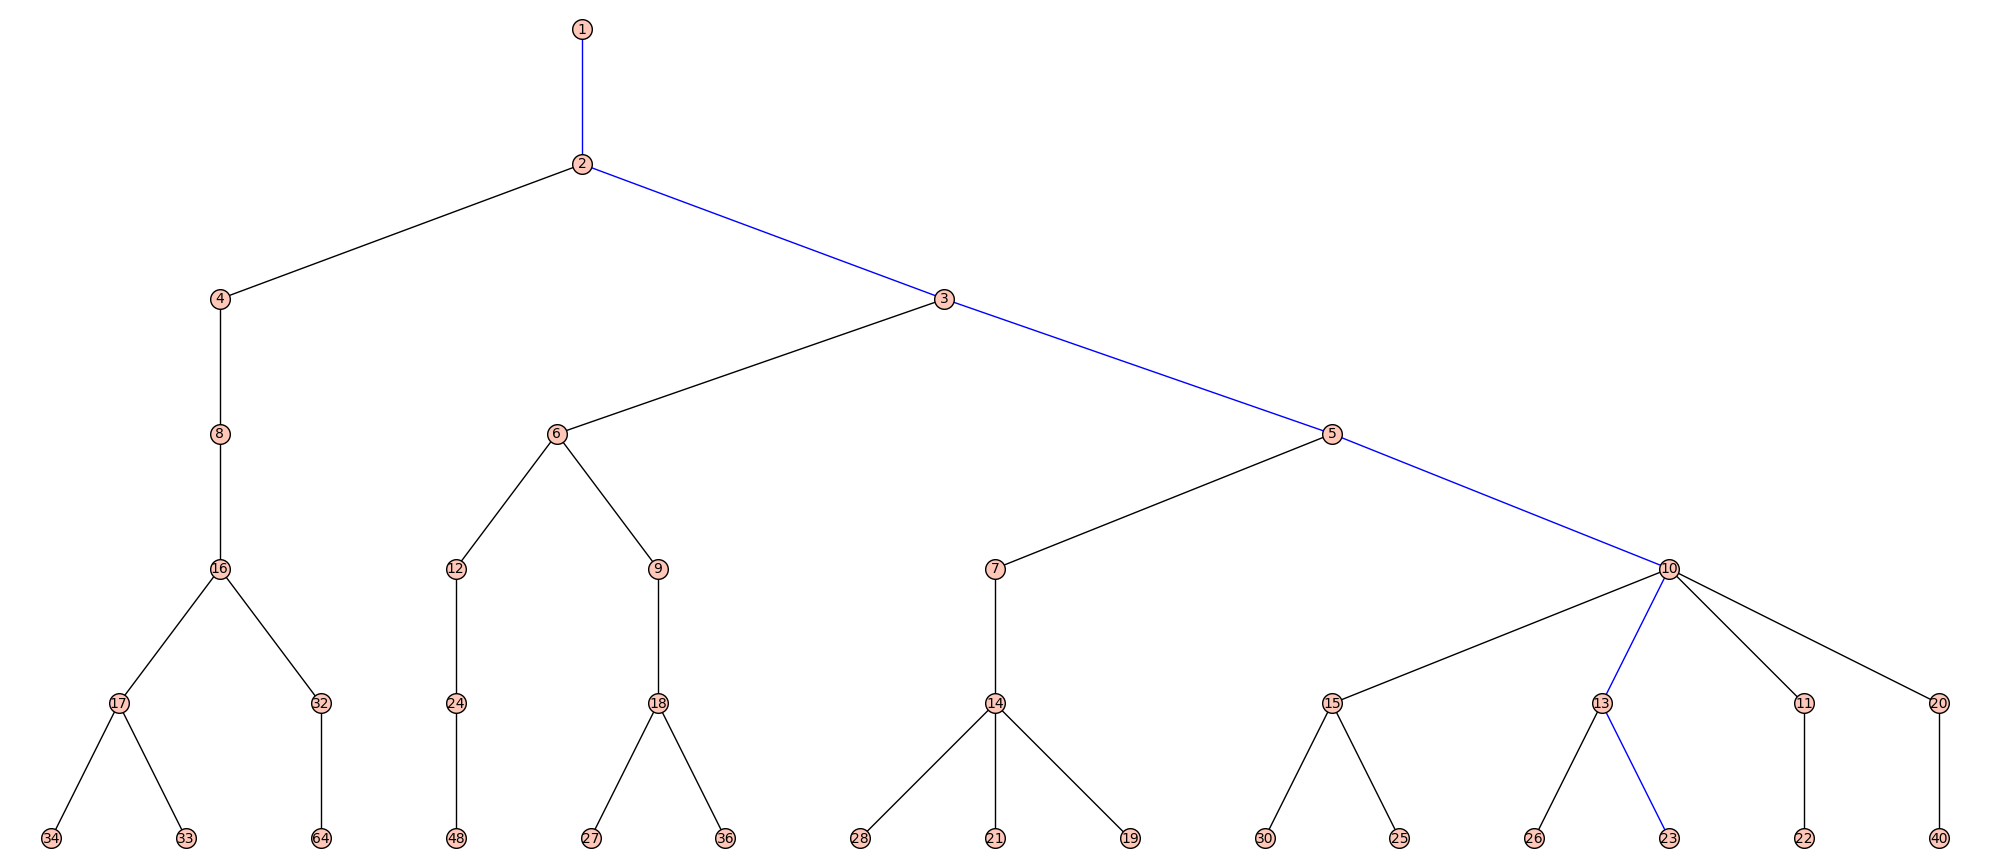

In [11]:
show_tree(23)

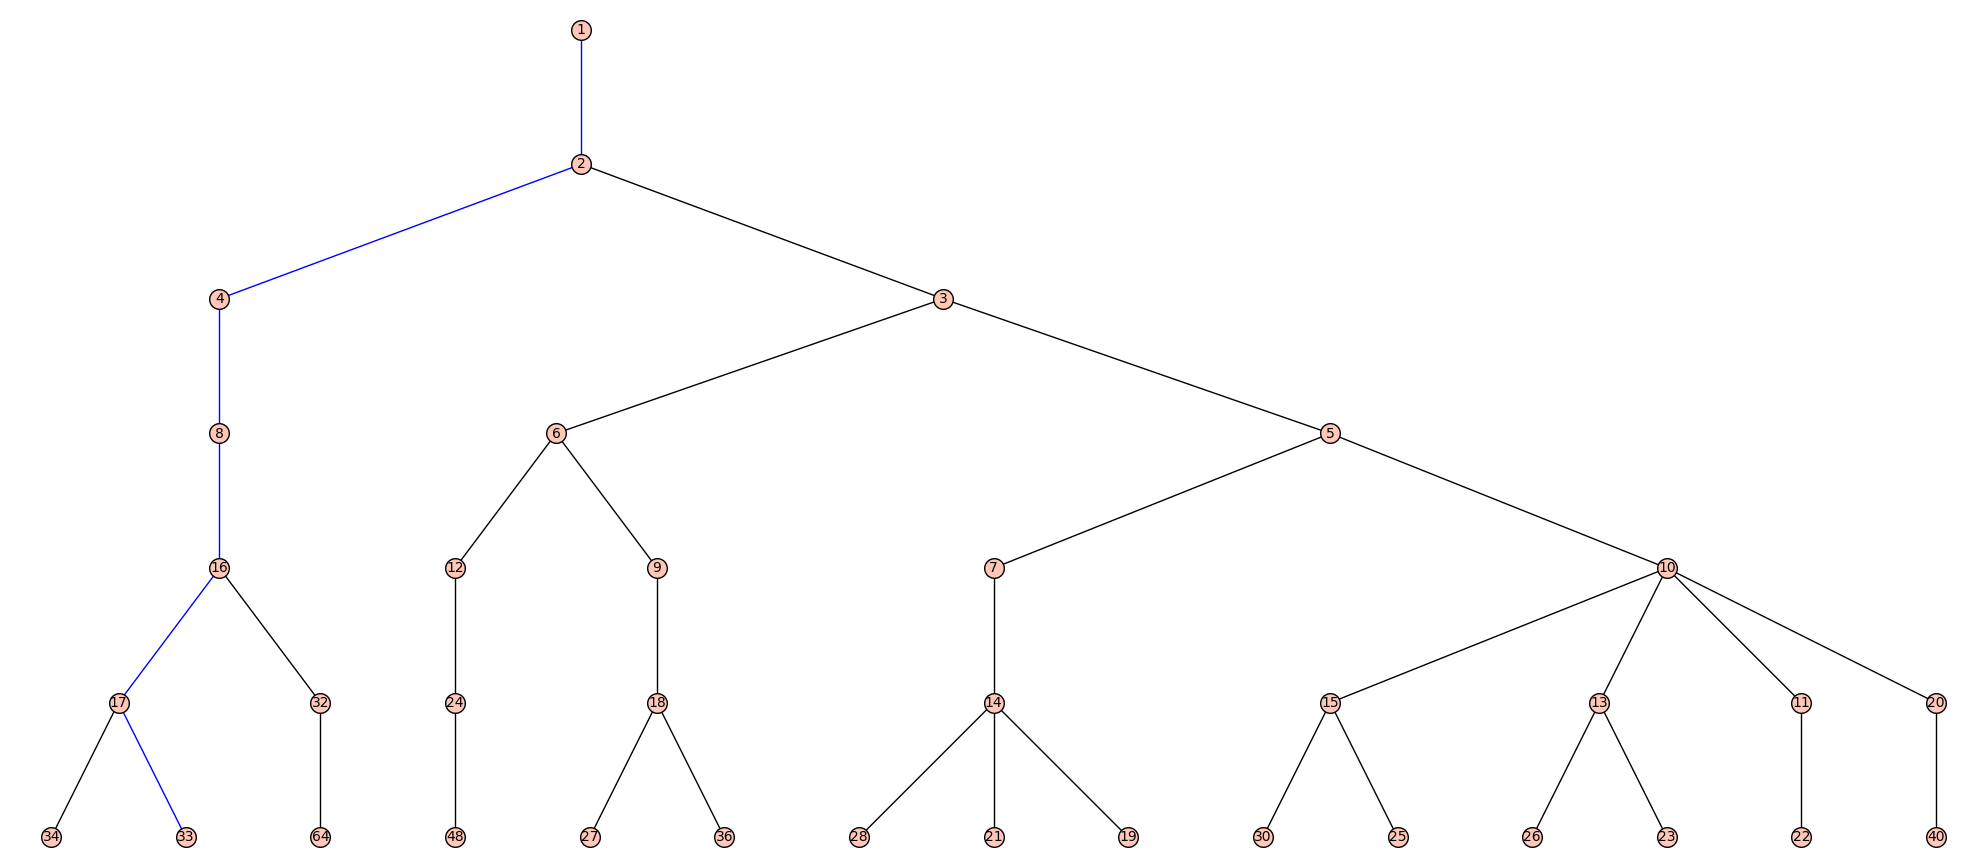

In [12]:
show_tree(33)

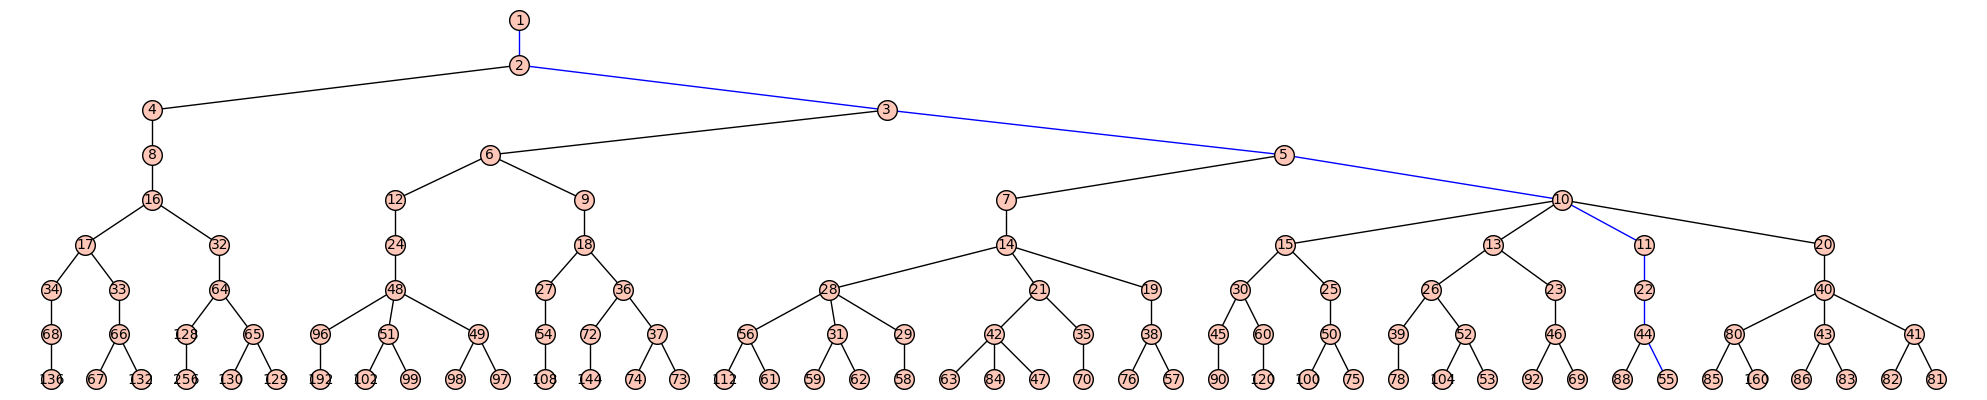

In [13]:
show_tree(55)

Теперь напишем функцию для сравнения двух методов

In [14]:
def SX_and_tree_comparison():
    tree = degree_tree(2000)
    for i in range(2, 1000):
        if (floor(log(i, 2)) + bin(i)[2:].count('1') - 1) < len(tree.shortest_path(1, i)) - 1:
            print("Всё не ОК")
            return
    print("Всё ОК")
    
SX_and_tree_comparison()

Всё ОК


Как можно заметить, во всех случаях рассмотренных в цикле, дерево степеней как минимум не уступает в оптимальности бинарному методу

#### Вывод
Дерево степеней является довольно эффективным способ нахождения степени числа, т.к. не уступает в количестве операций методу $SX$, а иногда и превосходит ($n = 55$, $n = 23$). Следовательно дерево лучше метода возведения справа налево. По реализации 

### Дерево убывающих степеней
Алгоритм обычного дерева степеней был немного изменён для построения дерева убывающих степеней.

In [15]:
def descending_degree_tree(n):
    number_found = False
    d_tree = Graph()
    d_tree.add_vertex(1)
    added_vertices = [1]
    while number_found == False:
        new_vertices = []
        for element in added_vertices:
            path = d_tree.shortest_path(1, element)
            for vert in path:
                new_vertice = element + vert
                if new_vertice not in d_tree.vertices():
                    d_tree.add_vertex(new_vertice)
                    d_tree.add_edge(element, new_vertice)
                    new_vertices.append(new_vertice)
                    if new_vertice == n:
                        number_found = True
        added_vertices = sorted(new_vertices)[::-1] #Записываем новые вершины в порядке убывания
    return d_tree


In [16]:
def show_descending_tree(n):
    tree = descending_degree_tree(n)
    plt = tree.plot(layout = 'tree', figsize=(20, 10), tree_root = 1, edge_colors={(0, 0, 1): edge_path(tree, n)})
    plt.show()
    

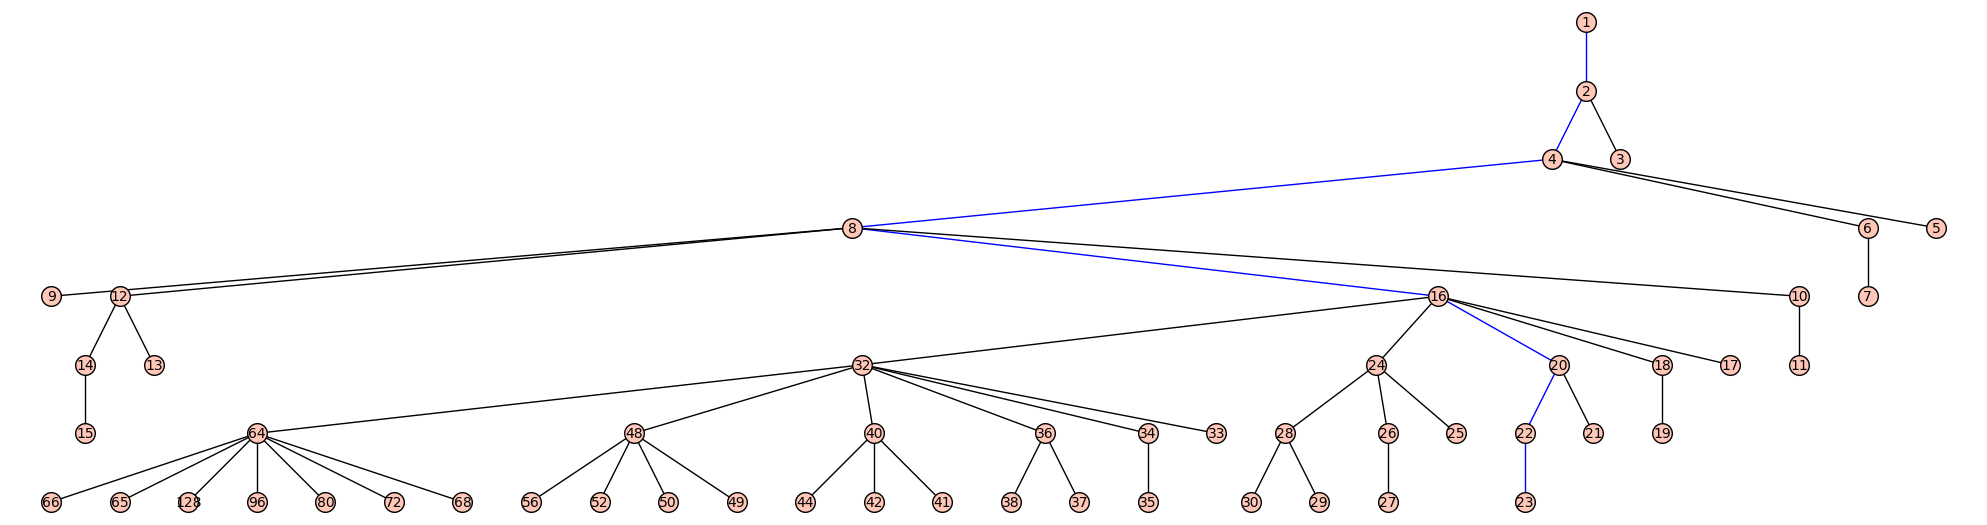

In [17]:
show_descending_tree(23)

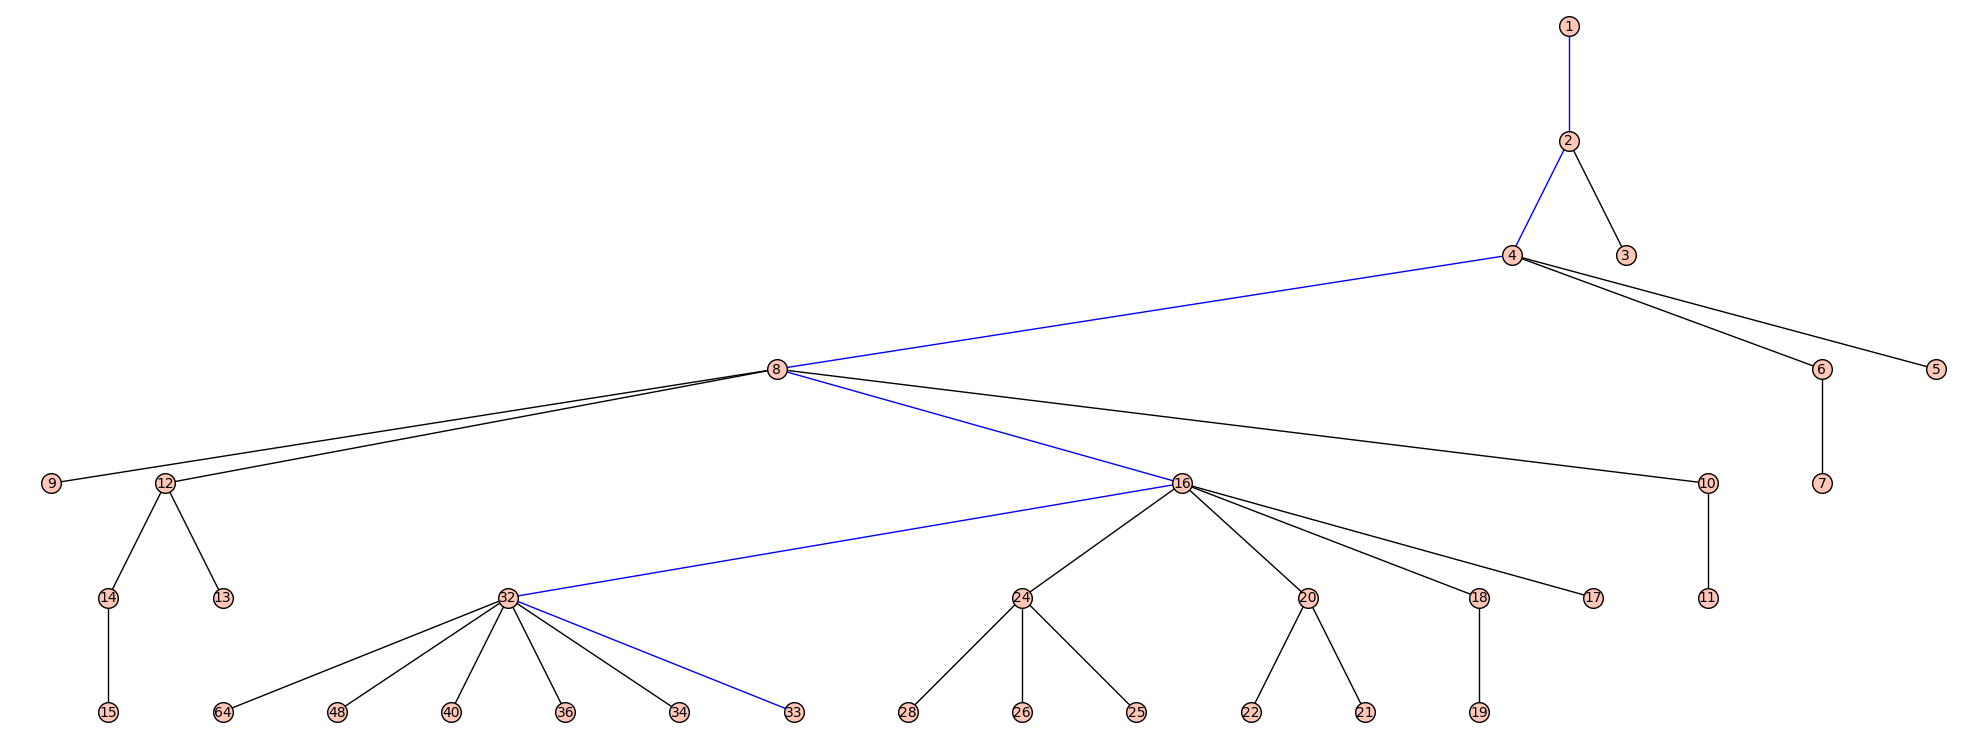

In [18]:
show_descending_tree(33)

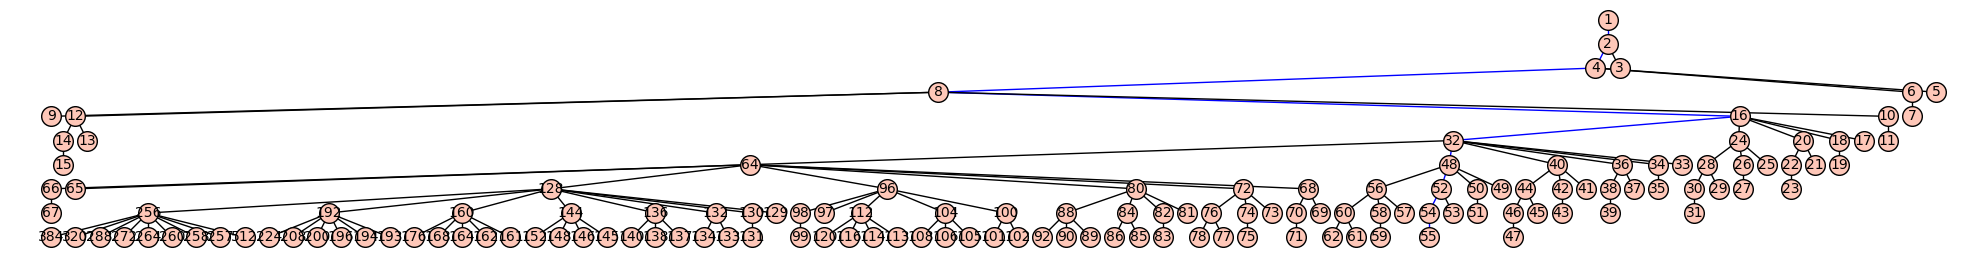

In [19]:
show_descending_tree(55)

Теперь напишем функцию для сравнения двух методов

In [20]:
def SX_and_descending_tree_comparison():
    tree = descending_degree_tree(3000)
    for i in range(2, 1000):
        if (floor(log(i, 2)) + bin(i)[2:].count('1') - 1) != len(tree.shortest_path(1, i)) - 1:
            print("Всё не ОК")
            return
    print("Всё ОК")
    
SX_and_descending_tree_comparison()

Всё ОК


## Выводы
Были реализованы и сравнены методы оптимального возведения числа в заданную степень ($SX$, метод возведения в степень справа налево, дерево степеней), рассмотрен метод множителей. Наиболее эффективным из всех изученых был метод дерева степеней, наименее эфективным – метод возведения в степень справа налево.